In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [25]:
df=pd.read_csv('day_wise.csv')
covid_df=df.dropna()
print(covid_df['Date'].min())
covid_df['Date']=pd.to_datetime(covid_df['Date']).dt.date
covid_df['Date']

2020-01-22


0      2020-01-22
1      2020-01-23
2      2020-01-24
3      2020-01-25
4      2020-01-26
          ...    
183    2020-07-23
184    2020-07-24
185    2020-07-25
186    2020-07-26
187    2020-07-27
Name: Date, Length: 188, dtype: object

In [26]:
start_date=covid_df['Date'].min()
end_date=covid_df['Date'].max()

In [28]:
df=covid_df[(covid_df['Date']>=start_date)&(covid_df['Date']<=end_date)]
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [34]:
import datetime

now=datetime.date.today()
now=pd.to_datetime(now)
now

Timestamp('2023-03-22 00:00:00')

In [23]:
fig=px.line(covid_df, x='Date', y=['Confirmed', 'Recovered'])
fig.show()

In [26]:
ROW_NUM=covid_df.shape[0]
TRAIN_SPLIT=0.7


In [27]:
TRAIN_NUM=int(ROW_NUM*TRAIN_SPLIT)
df_train=covid_df.iloc[:TRAIN_NUM, :] 
df_test=covid_df.iloc[TRAIN_NUM:, :] 

C:\Users\alkos\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



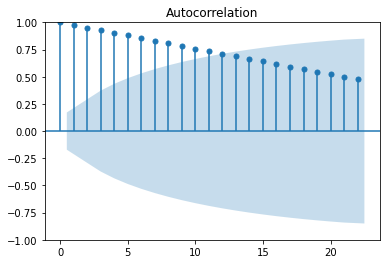

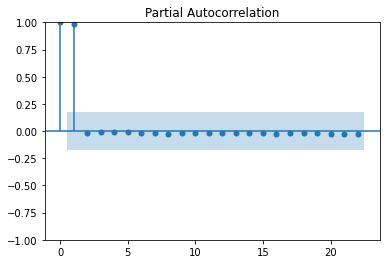

In [28]:
acf_originl=plot_acf(df_train['Confirmed'])
pacf_original=plot_pacf(df_train['Confirmed'])

In [29]:
adf_test = adfuller(df_train['Confirmed'])
print(f'p-value: {adf_test[1]}')

p-value: 0.9988388697805781


In [30]:
model=ARIMA(df_train['Confirmed'], order=(0, 2, 2))
model_fit=model.fit()

<AxesSubplot:>

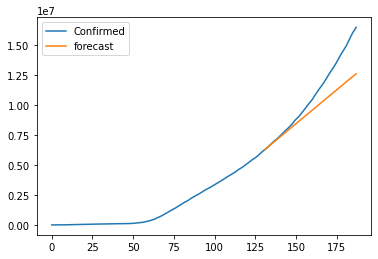

In [31]:
forecast_test=model_fit.forecast(len(df_test))
covid_df['forecast']=[None]*TRAIN_NUM+list(forecast_test)
covid_df.plot()

In [35]:
from pmdarima.arima import auto_arima

In [40]:
model=auto_arima(df_train['Confirmed'], start_p=0, atart_q=0, test='adf', max_p=5, max_q=5, m=1, d=2, seasonal=True, start_P=0, D=2, trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2655.290, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2653.829, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2654.468, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2654.378, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2653.541, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2654.643, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2655.202, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2656.435, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2630.504, Time=0.59 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2625.924, Time=0.60 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2648.318, Time=0.11 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=2.98 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2632.839, Time=0.25 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=2

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  131
Model:               SARIMAX(5, 2, 3)   Log Likelihood               -1298.693
Date:                Sun, 01 Jan 2023   AIC                           2617.387
Time:                        19:59:06   BIC                           2645.985
Sample:                             0   HQIC                          2629.007
                                - 131                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    970.1464    696.262      1.393      0.164    -394.501    2334.794
ar.L1          0.5327      0.526      1.014      0.311      -0.497       1.563
ar.L2         -0.4607      0.431     -1.069      0.285      -1.305       0.384
ar.L3         -0.4822      0.323     -1.495      0.135      -1.114       0.150
ar.L4         -0.0772      0.191     -0.403      0.687      -0.452       0.298
ar.L5         -0.2243      0.122     -1.837      0.066      -0.464       0.015
ma.L1         -0.8672      0.535     -1.621      0.105      -1.916       0.181
ma.L2          0.6476      0.618      1.048      0.294      -0.563       1.858
ma.L3          0.1889      0.501      0.377      0.706      -0.794       1.172
sigma2       3.32e+07      0.053   6.29e+08      0.000    3.32e+07    3.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                76.81
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+24. Standard errors may be unstable.
"""

In [45]:
model=SARIMAX(df_train['Confirmed'], order=(4, 2, 0), seasonal_order=(0, 1, 1, 7))
model_fit=model.fit()

<AxesSubplot:>

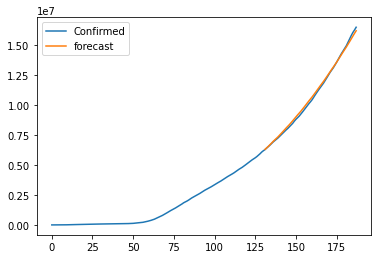

In [46]:
forecast_test=model_fit.forecast(len(df_test))
covid_df['forecast']=[None]*TRAIN_NUM+list(forecast_test)
covid_df.plot()

In [47]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df_test['Date'],
    y=df_test['Confirmed'],
    mode='lines',
    name='Actual values'
))
fig.add_trace(go.Scatter(
    x=covid_df.iloc[TRAIN_NUM:,0],
    y=covid_df.iloc[TRAIN_NUM:,2],
    mode='lines',
    name='Predicted values'
))
fig.show()

In [4]:
import pandas as pd
pd.DataFrame(pd.date_range(start="2018-09-09",end="2020-02-02"), columns=['Dates']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   512 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 KB
